# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
  
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | jiddah
City not found. Skipping...
Processing Record 3 of Set 1 | hovd
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | marshall
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | matadi
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | freeport
Processing Record 13 of Set 1 | santa cruz
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | talcahuano
Processing Record 22 of Set 1 | kirakira
Processing Record 23 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,22.29,66,20,5.14,ZA,1681386978
1,hovd,48.0056,91.6419,4.11,25,69,1.77,MN,1681386978
2,rikitea,-23.1203,-134.9692,25.64,70,100,5.48,PF,1681386979
3,marshall,34.3834,-86.3333,15.76,67,89,4.34,US,1681386762
4,vaini,-21.2000,-175.2000,25.09,88,20,3.60,TO,1681386979


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,22.29,66,20,5.14,ZA,1681386978
1,hovd,48.0056,91.6419,4.11,25,69,1.77,MN,1681386978
2,rikitea,-23.1203,-134.9692,25.64,70,100,5.48,PF,1681386979
3,marshall,34.3834,-86.3333,15.76,67,89,4.34,US,1681386762
4,vaini,-21.2000,-175.2000,25.09,88,20,3.60,TO,1681386979


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

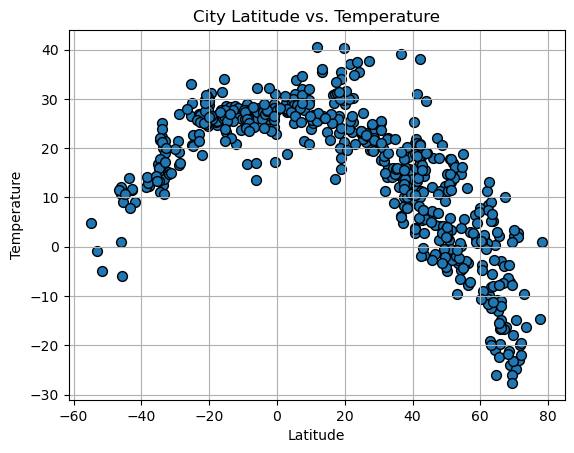

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', title="City Latitude vs. Temperature", grid=True, edgecolor='black', s=50)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

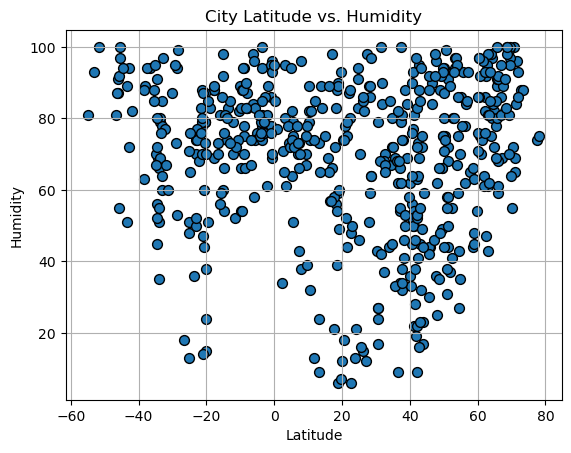

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', title="City Latitude vs. Humidity", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

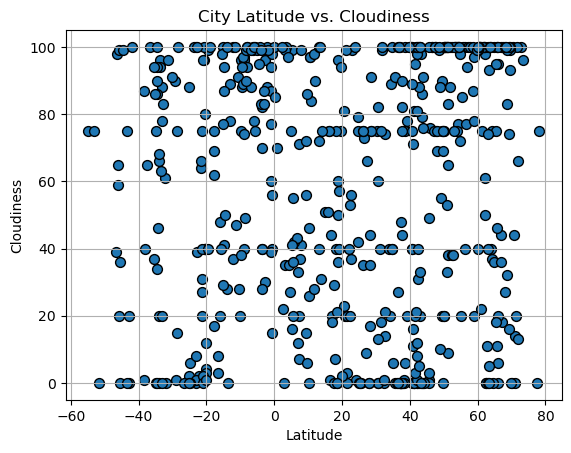

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', title="City Latitude vs. Cloudiness", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

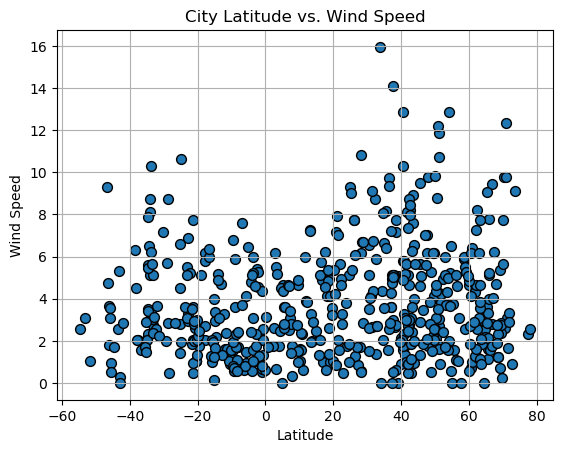

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', title="City Latitude vs. Wind Speed", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#a = df, b = x ax, c = y ax, d = x axis title, e = y axis title, f = plt.title
from sklearn.linear_model import LinearRegression

def Linear_Regression(a, b, c, d, e, f):
    x = a.iloc[:, b].values.reshape(-1, 1)
    y = a.iloc[:, c].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(x)
    
    a.plot.scatter(NHW_df.columns[b],NHW_df.columns[c])
    
    plt.xlabel(str(d))
    plt.ylabel(str(e))
    plt.title(str(f))
    plt.plot(x, y_pred, color='red')
    return plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
NHW_df = city_data_df[city_data_df['Lat']>0]

# Display sample data
NHW_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hovd,48.0056,91.6419,4.11,25,69,1.77,MN,1681386978
3,marshall,34.3834,-86.3333,15.76,67,89,4.34,US,1681386762
5,college,64.8569,-147.8028,-10.82,82,100,2.57,US,1681386979
6,hilo,19.7297,-155.0900,21.27,93,75,3.58,US,1681386979
8,hasaki,35.7333,140.8333,14.56,69,0,8.16,JP,1681386980


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
SHW_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
SHW_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,22.29,66,20,5.14,ZA,1681386978
2,rikitea,-23.1203,-134.9692,25.64,70,100,5.48,PF,1681386979
4,vaini,-21.2000,-175.2000,25.09,88,20,3.60,TO,1681386979
7,matadi,-5.8167,13.4500,32.19,58,78,0.93,CD,1681386979
11,santa cruz,-17.8000,-63.1667,24.70,88,75,6.17,BO,1681386978


###  Temperature vs. Latitude Linear Regression Plot

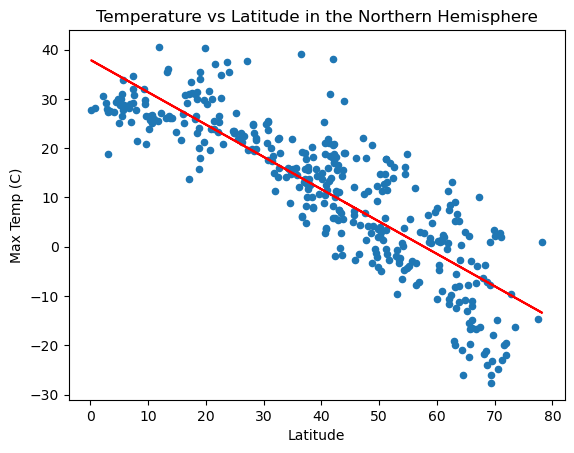

In [15]:
# Linear regression on Northern Hemisphere
Linear_Regression(NHW_df, 1, 3,
       "Latitude", 
       "Max Temp (C)",
       "Temperature vs Latitude in the Northern Hemisphere"
      )

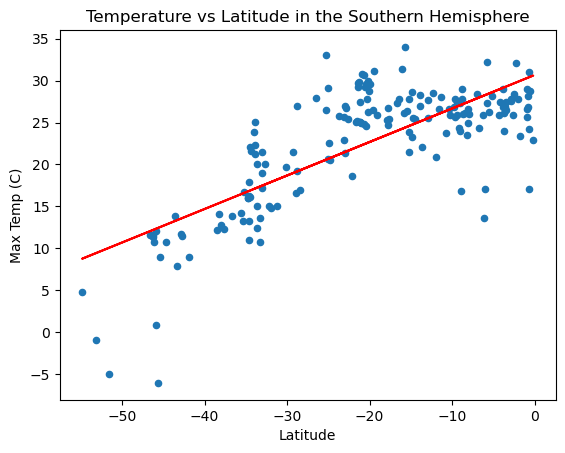

In [16]:
# Linear regression on Southern Hemisphere
Linear_Regression(SHW_df, 1, 3,
       "Latitude",
       "Max Temp (C)",
       "Temperature vs Latitude in the Southern Hemisphere"
      )

**Discussion about the linear relationship:** 
What we see from these plots is that there appears to be a fairly strong relationship between Latitude and Max Temperature, paritularly noticable on the plot of the Northern Hemisphere which is suggesting a strong negative correlation.
This tells us that the further you move north from the equator, the colder the temperatures get, which is intuitively what we would expect to find. Likewise, in our Southern Hemisphere graph, we see that the closer you move toward the equator, the higher the max temperature becomes, on average.

### Humidity vs. Latitude Linear Regression Plot

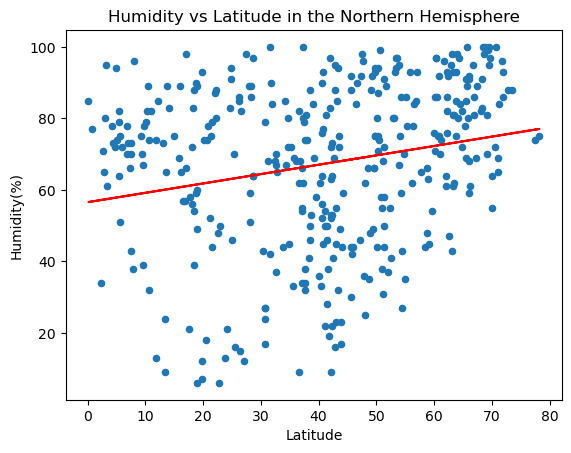

In [17]:
# Northern Hemisphere
Linear_Regression(NHW_df, 1, 4,
       "Latitude",
       "Humidity(%)",
       "Humidity vs Latitude in the Northern Hemisphere"
      )

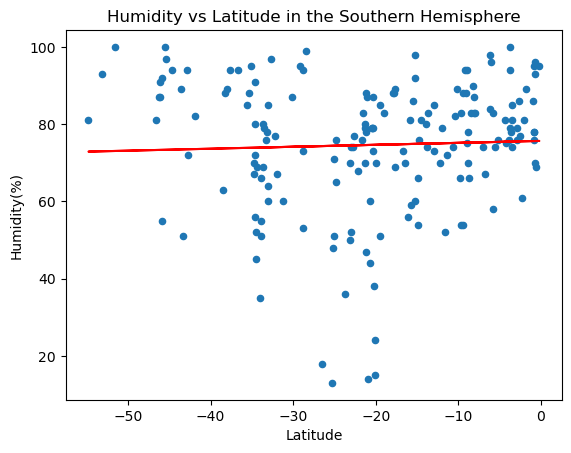

In [18]:
# Southern Hemisphere
Linear_Regression(SHW_df, 1, 4,
       "Latitude",
       "Humidity(%)",
       "Humidity vs Latitude in the Southern Hemisphere"
      )


**Discussion about the linear relationship:**
Here we see less of a relationship between these two factors. There is possibly a weak positive correlation between Latitude and Humidity in the Northern Hemisphere but nearly no relationship at all in the Southern Hemisphere data. You can see from the scatter plot that the points are distributed quite widely across the range of the graph with minimal discernible pattern.

### Cloudiness vs. Latitude Linear Regression Plot

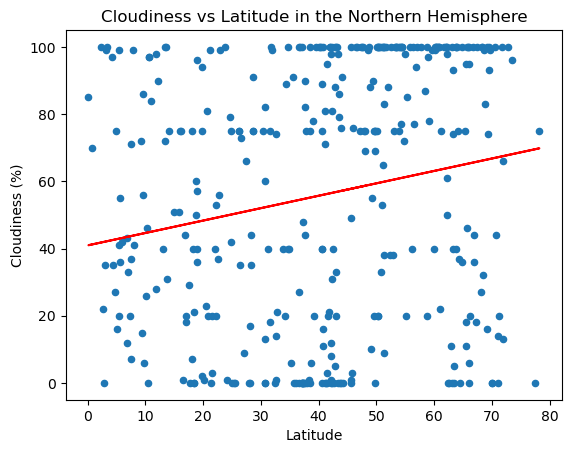

In [19]:
# Northern Hemisphere
Linear_Regression(NHW_df, 1, 5,
       "Latitude",
       "Cloudiness (%)",
       "Cloudiness vs Latitude in the Northern Hemisphere"
      )

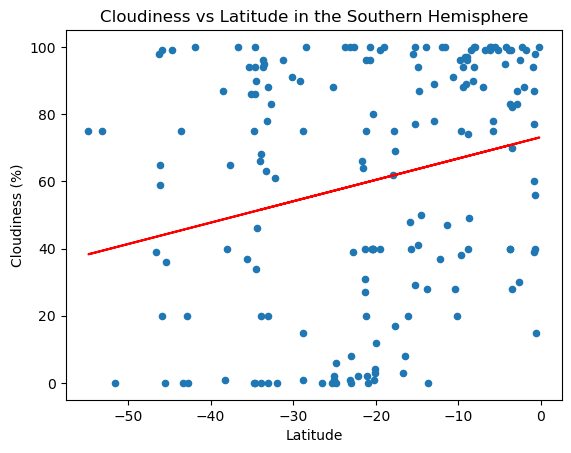

In [20]:
# Southern Hemisphere
Linear_Regression(SHW_df, 1, 5,
       "Latitude",
       "Cloudiness (%)",
       "Cloudiness vs Latitude in the Southern Hemisphere"
      )

**Discussion about the linear relationship:** 
This, looks like a weak correlation, with points spread widely across both graphs. The overall pattern of the cities is fairly random.

### Wind Speed vs. Latitude Linear Regression Plot

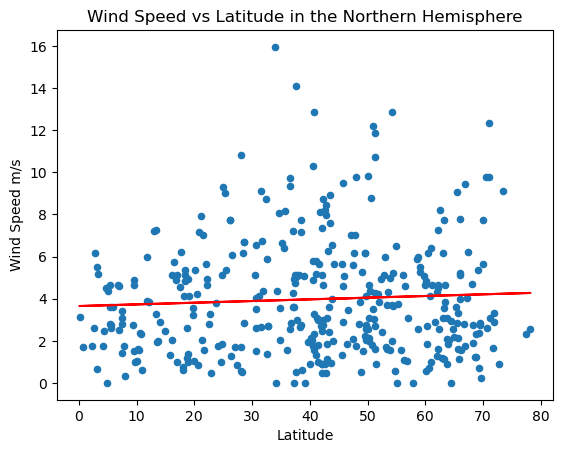

In [21]:
# Northern Hemisphere
Linear_Regression(NHW_df, 1, 6,
       "Latitude",
       "Wind Speed m/s",
       "Wind Speed vs Latitude in the Northern Hemisphere"
      )

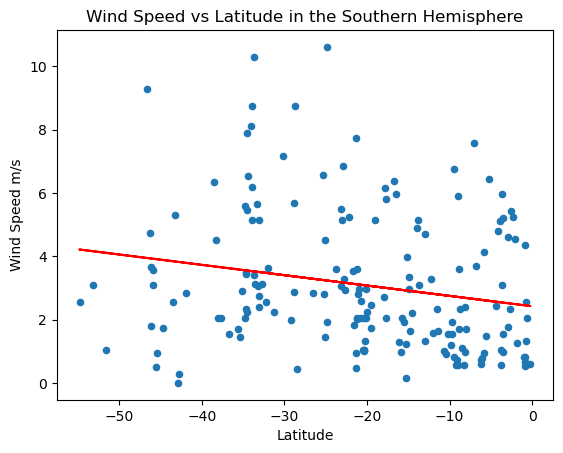

In [22]:
# Southern Hemisphere
Linear_Regression(SHW_df, 1, 6,
       "Latitude",
       "Wind Speed m/s",
       "Wind Speed vs Latitude in the Southern Hemisphere"
      )

**Discussion about the linear relationship:**
The overall relationship between Latitude and Wind Speed in general is fairly weak. The Northern Hemisphere graph suggests nearly no relationship, and the Southern Hemisphere graph would be a weak negative correlation, with a few large values at the lowest latitudes that may be affecting these results.